### Plotting the ANTI-CCP3 levels across disease status

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
options(warn = -1)



In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 5, repr.plot.height = 5)

## 1B recreation 

In [4]:
master_meta=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/Figure_input_files/ALTRA_Fig1_Master_meta_bri_Updated
                    .csv")
master_meta%>%head(3)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1


#### MARK code for coding the new early RA status


In [5]:
# Subset df based on the disease status to plot 
altra_Xsec_v1 <- master_meta %>%
  filter(Status_Xsec %in% c("ALTRA_healthy", "at_risk", "early_RA"))

In [6]:
# updating the converters for plotting 
conv <- c('CU1003', 'CU1007', 'CU1009', 'CU1010', 'CU1015', 'CU1021', 'CU1029', 
          'CU1033', 'CU1037', 'CU1039', 'CU1044', 'CU1050', 'CU1052', 'CU1053', 
          'SD1003', 'SD1007')


altra_Xsec_v2 <- altra_Xsec_v1 %>%
    mutate(subStatus = ifelse(Status_Xsec == 'early_RA' & subject.subjectGuid %in% conv, 
                              'Converter', 
                              Status_Xsec)) %>%
    filter(!is.na(subStatus), # remove longitudinal samples
           sample.sampleKitGuid != 'KT04113') # remove duplicate CU1009 (post-conversion) entry to match other analyses


# i do not have updated info to correctly determine IA vs RA at this time


head(altra_Xsec_v2)
nrow(altra_Xsec_v2)

table(altra_Xsec_v2$Status_Xsec, altra_Xsec_v2$subStatus)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new,subStatus
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1,ALTRA_healthy
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1,ALTRA_healthy
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1,ALTRA_healthy
4,4,ALTRA_healthy,NA,KT02292,2022-09-01,0,SD1020,Female,1986,NA,NA,3,ALTRA_healthy,-2000,CON1,CON104,CON1,ALTRA_healthy
5,5,ALTRA_healthy,NA,KT02298,2022-09-01,0,SD1026,Female,1965,NA,NA,NA,ALTRA_healthy,-2000,CON1,CON105,CON1,ALTRA_healthy
6,6,ALTRA_healthy,NA,KT02303,2022-09-01,0,SD1024,Female,1944,NA,NA,4,ALTRA_healthy,-2000,CON1,CON106,CON1,ALTRA_healthy


[1] 110

               
                ALTRA_healthy at_risk Converter early_RA
  ALTRA_healthy            38       0         0        0
  at_risk                   0      45         0        0
  early_RA                  0       0        16       11

In [7]:
# taking log of anti-ccp3 levels for plotting 
altra_Xsec_v2 <- altra_Xsec_v2 %>%
  mutate(log2_anti_ccp3_finalCombined = log2(anti_ccp3_finalCombined))
altra_Xsec_v2%>%head(3)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new,subStatus,log2_anti_ccp3_finalCombined
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1,ALTRA_healthy,-Inf
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1,ALTRA_healthy,1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1,ALTRA_healthy,-Inf


In [8]:
altra_Xsec_v2 <- altra_Xsec_v2 %>%
  mutate(Substatus_MS = case_when(
    subStatus == "ALTRA_healthy" ~ "CON1",
    subStatus %in% c("at_risk", "Converter") ~ "ARI",
    subStatus == "early_RA" ~ "ERA",
    TRUE ~ NA_character_ # This ensures that if none of the conditions match, NA is returned
  ))

In [9]:
# Subset df based on the cross-sectional disease status
altra_Xsec_v3 <- altra_Xsec_v2 %>%
  filter(subStatus %in% c("ALTRA_healthy", "at_risk", "early_RA"))
altra_Xsec_v3%>%head(3)
altra_Xsec_v3%>%dim

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new,subStatus,log2_anti_ccp3_finalCombined,Substatus_MS
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1,ALTRA_healthy,-Inf,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1,ALTRA_healthy,1,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1,ALTRA_healthy,-Inf,CON1


[1] 94 20

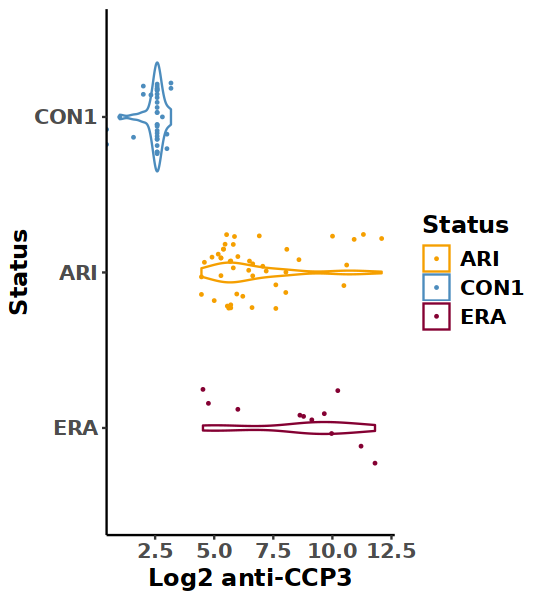

In [10]:
options(repr.plot.width = 4.5, repr.plot.height = 5)

pal3 = c("#F59F00","#4C8CBD","#840032")

# Use position_jitterdodge with a set jitter width and dodge width
pl_vl_rc <- ggplot(altra_Xsec_v3, aes(x = log2_anti_ccp3_finalCombined, y = factor(Substatus_MS, levels = c("ERA", "ARI", "CON1")), color = Substatus_MS)) +
  geom_violin(width = 0.7) +  # Adjust the width of the violins
  geom_point(position = position_jitterdodge(jitter.width = 0.5, dodge.width =0.9), size = 0.3) +  # Apply controlled jitter
  theme_classic() +
  labs(x = "Log2 anti-CCP3", y = "Status", color = "Status") +
  theme(
    axis.text = element_text(size = 12, face = 'bold'),  # Adjust x and y axis text properties
    axis.title = element_text(size = 14, face = 'bold'),  # Adjust axis title properties
    legend.text = element_text(size = 12, face = 'bold'),  # Adjust legend text properties
    legend.title = element_text(size = 14, face = 'bold'),  # Adjust legend title properties
    panel.grid.minor = element_blank()  # Remove minor grid lines
  ) +
  scale_color_manual(values = pal3)

# Display the plot
pl_vl_rc

# Save the plot
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_1B_Xsec_ViolinPlot_UPDATED.pdf", plot = pl_vl_rc, width = 4, height = 4, units = "in")


In [11]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] plotly_4.10.4               knitr_1.47                 
 [3] ggpubr_0.6.0                SeuratDisk_0.0.0.9021      
 [5] SingleCellExperiment_1.22.0 SummarizedExperiment_1.30.2
 [7] Biobase_2.60.0              GenomicRanges_1.52.1       
 [9] GenomeInfoDb_1.36.4         IRange